## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [58]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

#Setting the seed to assure you get the same answers on quizzes as we set up
random.seed(50)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [59]:
# read the dataset
df = pd.read_csv('ab_data.csv')

# inspect the dataset
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [60]:
# use shape function to show the number of rows [first element]
row_num = df.shape[0]
print("Number of rows is: {}".format(row_num))

Number of rows is: 294478


c. The number of unique users in the dataset.

In [63]:
#use unique() function
user_total = df.nunique()['user_id']
print("Number of unique users is : {}".format(user_total))

Number of unique users is : 290584


d. The proportion of users converted.

In [64]:
#Finding the proportion of users converted by taking the mean since values are 1 and 0
print("Converted users proportion is {}%".format((df['converted'].mean())*100))

Converted users proportion is 11.96591935560551%


e. The number of times the `new_page` and `treatment` don't line up.

In [65]:
# Looking for rows where treatment/control doesn't line up with old/new pages respectively
df_t_not_n = df[(df['group'] == 'treatment') & (df['landing_page'] == 'old_page')]
df_not_t_n = df[(df['group'] == 'control') & (df['landing_page'] == 'new_page')]

# Add lengths
mismatch= len(df_t_not_n) + len(df_not_t_n)

# Create one dataframe from it
mismatch_df = pd.concat([df_t_not_n, df_not_t_n])

mismatch

3893

f. Do any of the rows have missing values?

In [66]:
# Check the missing values?
df.isnull().values.any()

False

In [67]:
# check the number of values in each rows by using info function
# entry values denote if any column has missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [68]:
# Delete Rows
# drop rows for mismatched treatment groups
df.drop(df.query("group == 'treatment' and landing_page == 'old_page'").index, inplace=True)
# drop rows for mismatched control groups
df.drop(df.query("group == 'control' and landing_page == 'new_page'").index, inplace=True)

In [69]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [70]:
# save new clean dataset with no duplicates or missing records  or mismatched values
# this dataset will be used in the next sections
df.to_csv('ab_edited.csv', index=False)

In [71]:
# read the new created dataset into another dataframe
df2 = pd.read_csv('ab_edited.csv')

In [72]:
# Double Check all of the correct rows were removed

df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

In [73]:
# inspect df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290585 entries, 0 to 290584
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.1+ MB


a. How many unique **user_id**s are in **df2**?

In [75]:
# unique user ids count is
len(df2['user_id'].unique())

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [76]:
# check if duplicates in user_id
# we know that one user id is repeated due to difference between #userids and #unique ids
sum(df2['user_id'].duplicated())

1

In [77]:
# inspect duplicate userid
df2[df2.duplicated(['user_id'], keep=False)]['user_id']

1876    773192
2862    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [78]:
#explore the details of rows with duplicate user ids
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [79]:
# delete the duplicate record 
# we choose the one with timestamp as "2017-01-09 05:37:58.781806"
time_dup = "2017-01-09 05:37:58.781806"
df2 = df2[df2.timestamp != time_dup]

In [80]:
# inspect number of entries in df2 after deleting duplicate record
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 290584
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [81]:
# as seen above, 290584 entries now as entry with index 1876 is deleted
# we can confirm by checking unique values of user ids
len(df['user_id'].unique())

290584

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [82]:
# since values are 1 and 0, we can calculate mean to get probability of an individual converting 
df['converted'].mean()

0.11959667567149027

b. Given that an individual was in the `control` group, what is the probability they converted?

In [83]:
# for this we group by column 'group'
# then we compute the statistics using describe function
# as conversions are assigned boolean values, we can use mean to find probability of conversion

df_grp = df.groupby('group')
df_grp.describe()

converted                                                user_id  \
              count      mean       std  min  25%  50%  75%  max     count   
group                                                                        
control    145274.0  0.120386  0.325414  0.0  0.0  0.0  0.0  1.0  145274.0   
treatment  145311.0  0.118807  0.323563  0.0  0.0  0.0  0.0  1.0  145311.0   

                                                                      \
                    mean           std       min       25%       50%   
group                                                                  
control    788164.072594  91287.914601  630002.0  709279.5  788128.5   
treatment  787845.618446  91161.258854  630000.0  708746.5  787874.0   

                                
                 75%       max  
group                           
control    867208.25  945998.0  
treatment  866718.50  945999.0

Thus, given that an individual was in the control group, the probability they converted is 0.120386


c. Given that an individual was in the `treatment` group, what is the probability they converted?

Thus, given that an individual was in the treatment group, the probability they converted is 0.118807


d. What is the probability that an individual received the new page?

In [84]:
# number of individuals which got new page is the same as those in treatment group
new_user = len(df.query("group == 'treatment'"))

# calculate the total number of users
users=df.shape[0]

# probability that an individual received in the new page is new_user/users
new_user_p = new_user/users
print(new_user_p)

0.5000636646764286


e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

### Answer:
**An individual was in the treatment group, the probability they converted is 0.118807
An individual was in the control group, the probability they converted is 0.120386
According to above proportions, there is a small difference between users converted from treatment group and from control group.
Therefore, No, there is not sufficient evidence that the treatment page leads to more conversions.**


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

### Answer:
**Null-hypothesis:
H0:$p_{new}$−$p_{old}$≤0 

i.e. The null hypothesis is that the difference between the population conversion rate of users given the new page and the old page will be equal to zero (the same) or lower than zero (the old page has a higher population conversion rate).

Alternative-hypothesis:
H1:$p_{new}$−$p_{old}$>0

i.e. The alternative hypothesis is that the difference between the population conversion rate of users given the new page and the old page will be greater than zero to zero (the new page has a higher population conversion rate).**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [85]:
#Find the proportion of converted rate assuming p_new and p_old are equal
p_new = df2['converted'].mean()
print(p_new)


0.119597087245


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [86]:
#Find the proportion of converted rate assuming p_new and p_old are equal
p_old = df2['converted'].mean()
print(p_old)

0.119597087245


c. What is $n_{new}$?

In [87]:
#Number of users landing on new page
n_new = len(df2.query("group == 'treatment'"))
print(n_new)

145310


d. What is $n_{old}$?

In [88]:
#Number of users landing on old page
n_old = len(df2.query("group == 'control'"))
print(n_old)

145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [89]:
#Draw samples from a binomial distribution
new_page_converted = np.random.binomial(1, p_new, n_new)


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [90]:
#Draw samples from a binomial distribution
old_page_converted = np.random.binomial(1, p_old,n_old)


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [92]:
#Number of rows from new page are higher than the ones on old page, therefore we truncate new page up to the numbers of old 
#page and compute the difference
new_page_converted = new_page_converted[:145274]

new_page_converted.mean() - old_page_converted.mean()

0.00059198480113441254

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

Here, value of size is different for n_new and n_old. So, computing difference will throw an error. Hence, we use mean function for both old and new page conversion simulations to overcome this problem of shape difference. We are still using probabilities as previous case.


In [93]:
#Simulate 10000 samples of the differences in conversion rates
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.binomial(1, p_new, n_new)
    old_page_converted = np.random.binomial(1, p_old, n_old)
    new_page_p = new_page_converted.mean()
    old_page_p = old_page_converted.mean()
    p_diffs.append(new_page_p - old_page_p)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

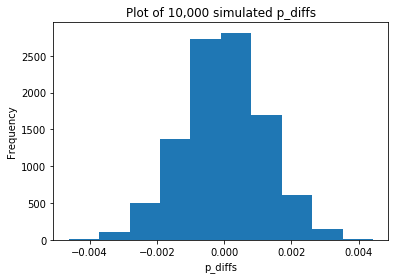

In [94]:
#Show the histogram
plt.hist(p_diffs)
plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.title('Plot of 10,000 simulated p_diffs');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [95]:
# compute difference from original dataset ab_data.csv
act_diff = df[df['group'] == 'treatment']['converted'].mean() -  df[df['group'] == 'control']['converted'].mean()
act_diff 

-0.0015790565976871451

In [96]:
#Convert to numpy array and calculate the p-value
p_diffs = np.array(p_diffs)
# proportion of p_diffs greater than the actual difference observed in ab_data.csv is computed as:
(act_diff < p_diffs).mean()

0.90180000000000005

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

### Answer:
**We are computing the P-value, which suggests if there is a significant difference between two groups for a hypothesis. 
In this case, the new page doesn't have better conversion rates than the old page because We conclude that the old and new pages perform almost similarly. Old pages showed better performance.**


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [97]:
import statsmodels.api as sm

df2.head(5) 


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [98]:
#Number of conversions for each page
convert_old = sum(df2.query('group == "control"')['converted'])
convert_new = sum(df2.query('group == "treatment"')['converted'])

#Number of individuals who received each page
n_old = df2.query("group == 'control'")['user_id'].count()
n_new = df2.query("group == 'treatment'")['user_id'].count()

#Convert figures to integers
n_old = int(n_old)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [101]:
#Two-sample Proportion Hypothesis Testing
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
z_score

-1.3109241984234394

In [102]:
p_value

0.90505831275902449

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [103]:
from scipy.stats import norm

print(norm.cdf(z_score))
# Tells us how significant our z-score is

# for our single-sides test, assumed at 95% confidence level, we calculate: 
print(norm.ppf(1-(0.05)))
# Tells us what our critical value at 95% confidence is 
# Here, we take the 95% values as specified in PartII.1

0.094941687241
1.64485362695


### Answer:

**Since the z-score of -1.3109241984234394 less than the critical value of 1.64485362695, we fail to reject the null hypothesis which suggest the new page conversion rate is higher than the old rate. Since they are different,And Yes I Agree with findings in parts j. and k.**


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

### Answer:
**Logistic regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [104]:
#Create intercept column
df2['intercept']=1

#Create dummies
ab_page = ['treatment', 'control']
df2['ab_page'] = pd.get_dummies(df2.group)['treatment']

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [105]:
logit = sm.Logit(df2['converted'], df2[['intercept','ab_page']])


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [106]:
#Fitting the model
results = logit.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


In [107]:
#Summary of our test results.
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 05 Dec 2018   Pseudo R-squ.:               8.077e-06
Time:                        21:47:48   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

### Answer:
**The p-value associated with ab_page column is 0.190 which is lower than the p-value .
we calculated using the z-score function. The reason why is different is due to the intercept added.
The logistic regression determines only two possible outcomes. If the new page is equal to the old page or different.**

$$ H_0: p_{new} = p_{old} $$$$ H_1: p_{new} \neq p_{old} $$

Our hypothesis here is:
H0  :  pnew  -  pold  = 0
H1  :  pnew  -  pold  != 0

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

### Answer:
**We should consider other factors into the regression model as they might influence the conversions too. 
Like consider introducing the timestamp metric to determine in which part of the day the individuals converted the most.
For example, if we find that the evening is the period that users spend most of their time on the internet we might also take it into consideration.
**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [108]:
countries_df = pd.read_csv('./countries.csv')
countries_df.head()


,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [109]:
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [110]:
df_new['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [111]:
### Create the necessary dummy variables
df_new[['CA', 'US']] = pd.get_dummies(df_new['country'])[['CA','US']]

df_new['country'].astype(str).value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [112]:
### Fit Your Linear Model And Obtain the Results
df['intercept'] = 1
log_mod = sm.Logit(df_new['converted'], df_new[['CA', 'US']])
#Fitting the model
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.447174
         Iterations 6


In [113]:
#Summary of our test results.
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 05 Dec 2018   Pseudo R-squ.:                 -0.2214
Time:                        21:48:37   Log-Likelihood:            -1.2994e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CA            -2.0375      0.026    -78.364      0.000      -2.088      -1.987
US            -1.9967      0.007   -292.314      0.000      -2.010      -1.983
==============================================================================
"""

## Conclusions :

**According to the analysis performed we found that the old page was better than the new page.

We accept the Null Hypothesis and Reject the Alternate Hypothesis.
Moreover, the histogram shows that the new page is not better than the old page.

From the regression above we see that the p-value is higher in US than in Canada, which means that users in the US are more likely to convert, but still not enough evidence to reject the null hypothesis.

This analysis has limitations due to factors not included in the data.**

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  This is the final project in Term 1.  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])